In [177]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import random
from sklearn.decomposition import PCA
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
path= "./data/train"
IMG_SIZE=70
#os.listdir(path)

## lets create our dataframe 

In [178]:
filenames=os.listdir(path)
category=[]

for filename in filenames:
    if 'dog' in filename:
        category.append('dog')
    else:
        category.append('cat')

df={'filename':filenames,'category':category}
df=pd.DataFrame(df)

In [179]:
df = df.sample(frac = 1).reset_index(drop=True)
#df.reset_index(drop=True)
df

,filename,category
0,dog.3533.jpg,dog
1,dog.6065.jpg,dog
2,cat.9414.jpg,cat
3,cat.4188.jpg,cat
4,dog.3275.jpg,dog
...,...,...
24995,cat.5722.jpg,cat
24996,dog.1398.jpg,dog
24997,cat.10665.jpg,cat
24998,cat.1504.jpg,cat


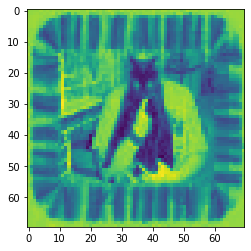

In [180]:
any_file=random.choice(df.filename)
img=cv2.imread(path+'/'+str(any_file))
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(img)

In [181]:
#img.shape
df["category"] = df["category"].replace({'cat': 1, 'dog': 0})
img_data=[]
img_label=[]
# if 'data.npy'in os.listdir('./'):
#     img_data=np.load('/data.npy')
# else:
for i in range(len(df)):
            img_path = path+'/'+df["filename"][i]
            image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
           # image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
            #here, we are normalizing the images
            norm_image = image/255.0 
            #Creating and saving each image in the form of numerical data in an array
           # df['data'][i]=np.array(norm_image)
            img_data.append(norm_image)
            img_label.append(df["category"][i])
#np.save('data.npy',img_data)
img_data=np.array(img_data)
img_label=np.array(img_label)
#df["data"]=img_data

In [182]:
#df_t = pd.DataFrame({'data': img_label, 'label': img_data}, columns=['label', 'data'])
#df_t = pd.DataFrame(img_data, columns=['data'])
#img_data.shape

## lets split the data to train and test

In [183]:
#df.reset_index(drop=True)
#df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
img_data=img_data.reshape(-1,IMG_SIZE*IMG_SIZE)
x_train=img_data[:20000]
y_train=img_label[:20000]
x_test=img_data[20000:]
y_test=img_label[20000:]
#img_label.shape
y_train.shape

(20000,)

In [146]:
# df={'Data':img_data,'label':img_label}
# df=pd.DataFrame(df)
#df
img_data.shape
#plt.imshow(x_train[2].reshape(IMG_SIZE,IMG_SIZE))
#df_train['data'].shape

(25000, 4900)

In [147]:
# x_train=np.array(df_train['data'])
#x_train.shape
# x_train.shape
# plt.imshow(x_train[0])
# x_train.shape

In [184]:
pca=PCA(n_components=0.9)
x_red=pca.fit_transform(x_train)
# #y_red=pca.tranform(y_train)
# #x_red_inv=pca.inverse_transform(x_red)
x_test_red=pca.transform(x_test)
x_red.shape

(20000, 317)

In [59]:
x_test.shape

(5000, 4900)

In [185]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [186]:
xgb_clf=xgb.XGBClassifier(learning_rate=1,use_label_encoder=False,eval_metric="mlogloss",verbosity=1)
xgb_clf.fit(x_red,y_train)
y_pred=xgb_clf.predict(x_test_red)
#scores["XGBoost"]=accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6171    0.5941    0.6054      2545
           1     0.5949    0.6179    0.6062      2455

    accuracy                         0.6058      5000
   macro avg     0.6060    0.6060    0.6058      5000
weighted avg     0.6062    0.6058    0.6058      5000



In [187]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique,counts)

[0 1] [ 9955 10045]


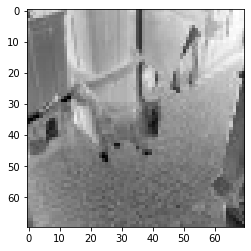

In [188]:
#rev=pca.inverse_transform(x_red)
plt.imshow(x_test[643].reshape(IMG_SIZE,IMG_SIZE),cmap=plt.cm.binary)


In [189]:
rf_clf=RandomForestClassifier(n_estimators=400,oob_score=True)
rf_clf.fit(x_red,y_train)
y_pred=rf_clf.predict(x_test_red)
#scores.append({"Random Forest":accuracy_score(y_test,y_pred)})
#scores["Random Forest"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6265    0.6605    0.6431      2545
           1     0.6271    0.5919    0.6090      2455

    accuracy                         0.6268      5000
   macro avg     0.6268    0.6262    0.6260      5000
weighted avg     0.6268    0.6268    0.6263      5000



In [190]:
unique, counts = np.unique(y_pred, return_counts=True)
print(unique,counts)

[0 1] [2683 2317]


In [191]:
unique, counts = np.unique(y_test, return_counts=True)
print(unique,counts)

[0 1] [2545 2455]


In [164]:
x_test

array([[0.21568627, 0.62745098, 0.52941176, ..., 0.72156863, 0.68235294,
        0.75686275],
       [0.4627451 , 0.19607843, 0.61960784, ..., 0.29019608, 0.53333333,
        0.21568627],
       [0.9254902 , 0.9254902 , 0.9372549 , ..., 0.67843137, 0.69019608,
        0.69411765],
       ...,
       [0.1372549 , 0.15686275, 0.18823529, ..., 0.75686275, 0.4627451 ,
        0.68235294],
       [1.        , 0.97254902, 0.90980392, ..., 0.43921569, 0.44313725,
        0.47058824],
       [0.94117647, 0.94901961, 0.94901961, ..., 0.99607843, 0.99607843,
        0.99607843]])